<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/MachineLearning/Ozone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# importing dependencies

import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
# reading the csv file !
df = pd.read_csv('TestingData.csv')
df.head()

,Mtemp,Htemp,Ltemp,Heat,Cool,Rain,WMSpeed,NO,NO2,PM2.5,O3
0,13.4,17.4,9.7,4.9,0.0,2.6,6.9,1.50,11.46,4.71,81.79
1,10.4,15.3,7.4,7.9,0.0,2.2,8.4,1.08,11.13,4.08,72.00
2,7.5,10.4,5.9,10.8,0.0,0.0,7.7,1.08,7.21,7.23,73.50
3,8.2,10.2,7.2,10.1,0.0,0.0,6.3,1.04,8.54,8.71,74.17
4,8.1,10.2,6.6,10.3,0.0,0.0,5.1,1.04,9.96,9.17,72.17


In [102]:
# checking for null values (missing values)
df.isnull().sum()

Mtemp      0
Htemp      0
Ltemp      0
Heat       0
Cool       0
Rain       0
WMSpeed    0
NO         0
NO2        0
PM2.5      0
O3         0
dtype: int64

In [103]:
# Data information
df.describe()

,Mtemp,Htemp,Ltemp,Heat,Cool,Rain,WMSpeed,NO,NO2,PM2.5,O3
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,17.386842,22.134649,13.687281,2.423684,1.478509,0.699123,5.691667,2.404298,15.822763,12.650965,90.460044
std,3.867668,4.522531,3.473990,2.463417,1.731650,3.579949,2.319857,1.469884,7.330013,6.511407,14.511075
min,7.500000,10.200000,5.600000,0.000000,0.000000,0.000000,1.900000,1.000000,2.790000,4.080000,53.790000
25%,14.775000,18.800000,11.275000,0.300000,0.000000,0.000000,4.000000,1.080000,10.682500,8.710000,81.177500
50%,17.400000,22.400000,13.650000,1.700000,0.800000,0.000000,5.500000,1.810000,14.310000,11.355000,89.440000
75%,20.525000,25.525000,16.200000,3.625000,2.525000,0.000000,6.950000,3.592500,19.892500,15.072500,98.345000
max,26.300000,34.400000,22.300000,10.800000,8.000000,39.200000,15.800000,7.000000,38.630000,63.830000,140.960000


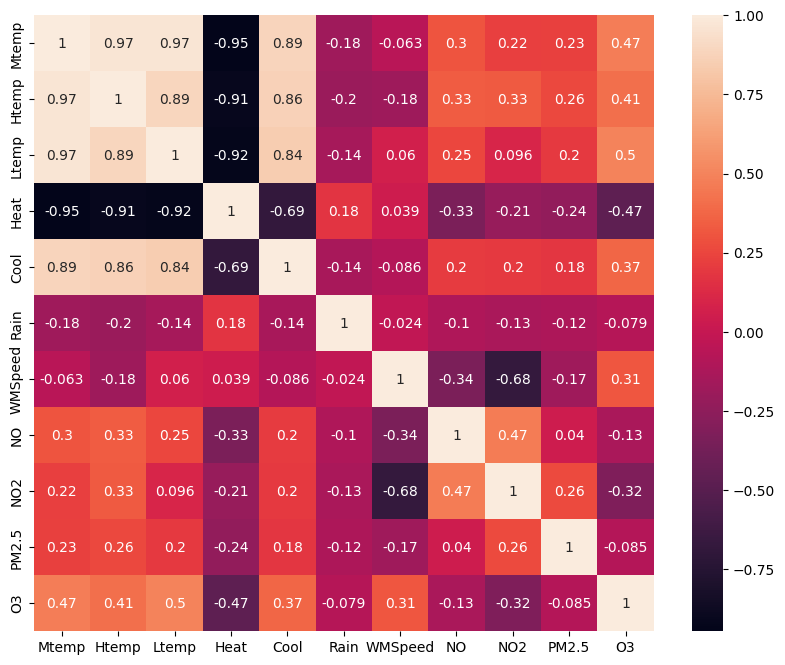

In [104]:
# correlation visualization
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))


g = sns.heatmap(df[top_corr_features].corr(),annot=True)

In [105]:
# Define X and y matrix :)
X = df[[ 'Mtemp',	'Htemp',	'Ltemp',	'Heat',	'Cool',	'Rain',	'WMSpeed',	'NO',	'NO2',	'PM2.5']] # Features
y = df['O3']  # Target

In [106]:
# Feature selection
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [108]:
X.head()

,Mtemp,Htemp,Ltemp,Heat,Cool,Rain,WMSpeed,NO,NO2,PM2.5
0,13.4,17.4,9.7,4.9,0.0,2.6,6.9,1.50,11.46,4.71
1,10.4,15.3,7.4,7.9,0.0,2.2,8.4,1.08,11.13,4.08
2,7.5,10.4,5.9,10.8,0.0,0.0,7.7,1.08,7.21,7.23
3,8.2,10.2,7.2,10.1,0.0,0.0,6.3,1.04,8.54,8.71
4,8.1,10.2,6.6,10.3,0.0,0.0,5.1,1.04,9.96,9.17


In [109]:
y.head()

0    81.79
1    72.00
2    73.50
3    74.17
4    72.17
Name: O3, dtype: float64

<Axes: xlabel='O3', ylabel='Density'>

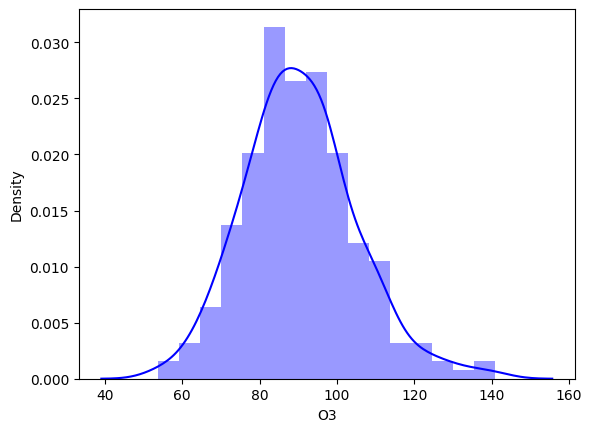

In [110]:
sns.distplot(y,color='blue')   # Distribution of O3

# 1. Linear Regression

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [168]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [113]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
Mtemp,4.882375
Cool,3.518718
NO,1.595757
Heat,1.290088
Ltemp,0.816764
NO2,0.669272
WMSpeed,0.425755
PM2.5,0.313399
Htemp,0.305202


In [114]:
scaler = StandardScaler()
stand_coef_linear_reg = make_pipeline(scaler, model)
stand_coef_linear_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [115]:
# standardizing the variables so that the values are converted to lie between -3 and +3
result = pd.DataFrame(list(zip(stand_coef_linear_reg.steps[1][1].coef_, df.columns)),
                     columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
Mtemp,18.841949
Cool,6.079810
NO2,4.894999
Heat,3.171047
Ltemp,2.831202
NO,2.340429
PM2.5,2.036190
Htemp,1.377253
WMSpeed,0.985522


In [150]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Best Hyperparameters: {'n_estimators': 138, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 12, 'bootstrap': True}


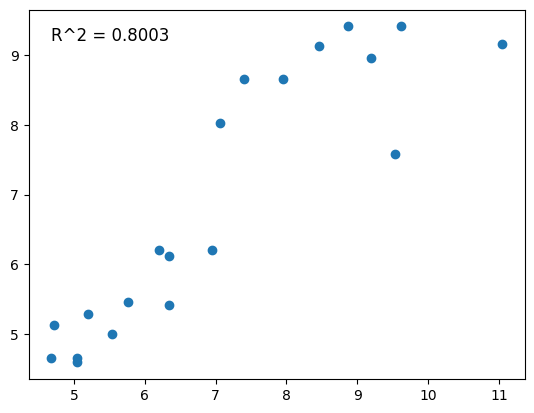

Mean Squared Error on Test Set: 0.676945934218343
R^2 (coefficient of determination): 0.800349952337972
Mean Absolute Error (MAE): 2.0843736261599046
Mean Squared Error (MSE): 0.676945934218343
Root Mean Squared Error (RMSE): 0.8227672418237998


In [171]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset or use a suitable dataset for regression
# For the purpose of this example, I'll generate a random dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an expanded hyperparameter search space
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=500, num=20)],  # Expanded range
    'max_depth': [None] + [int(x) for x in np.linspace(5, 50, num=20)],  # Expanded range
    'min_samples_split': [2, 5, 10, 15, 20],  # Existing hyperparameter
    'min_samples_leaf': [1, 2, 4, 8, 16],  # New hyperparameter
    'max_features': ['auto', 'sqrt', 'log2'],  # Existing hyperparameter
    'bootstrap': [True, False],  # New hyperparameter
}

# Create a RandomForestRegressor model
model = RandomForestRegressor()

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,  # Increase the number of random combinations
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Display R^2 on the plot
plt.text(np.min(y_test), np.max(predictions), f'R^2 = {r_squared:.4f}', fontsize=12, verticalalignment='top')
plt.scatter(y_test, predictions)
plt.show()

# Additional metrics
print('Mean Squared Error on Test Set:', mse)
print('R^2 (coefficient of determination):', r_squared)
print('Mean Absolute Error (MAE):', np.mean(np.abs(predictions - y_test)))
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', np.sqrt(mse))


In [172]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [181]:
# coefficient for X and and the y-intercept
print('coefficients: ', lr_model.coef_)
print('intercept: ', lr_model.intercept_)

coefficients:  [[2.79932366]]
intercept:  [4.14291332]


In [182]:
y_train_predictions = best_model.predict(X_train)

In [184]:
y_test_predictions = best_model.predict(X_test)

<Axes: ylabel='Density'>

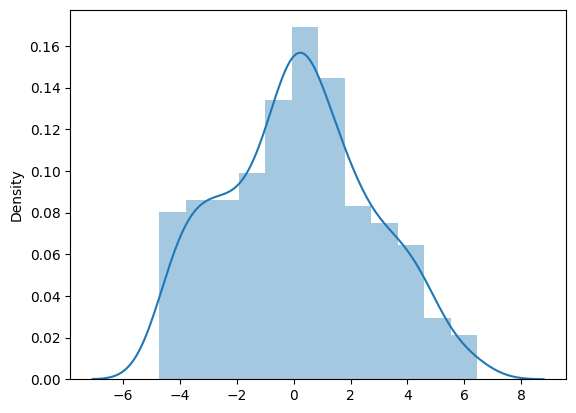

In [187]:
sns.distplot(y_test - predictions)

In [194]:
print('MSE for training data:', metrics.mean_squared_error(y_train, y_train_predictions))
print('MSE for training data: ', metrics.mean_squared_error(y_test, predictions))

MSE for training data: 0.6652907923320232
MSE for training data:  0.676945934218343


In [195]:
from sklearn.metrics import r2_score
print("Coefficient of determination R^2 <-- on train set:", r2_score(y_train, y_train_predictions))
print("Coefficient of determination R^2 <-- on test set:", r2_score(y_test, predictions))

Coefficient of determination R^2 <-- on train set: 0.8102560156000475
Coefficient of determination R^2 <-- on test set: 0.800349952337972


## Polynomial Regression

In [196]:
from sklearn.preprocessing import PolynomialFeatures

In [197]:
# Create polynomial features and fit a linear regression model
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [198]:
y_pred = polyreg.predict(X_test)

In [199]:
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Polynomial Regression is:', r_square)
print('MSE for testing data:', metrics.mean_squared_error(y_test, y_pred))

R-Square Error associated with Polynomial Regression is: 0.8124730482414345
MSE for testing data: 0.6358406072820808


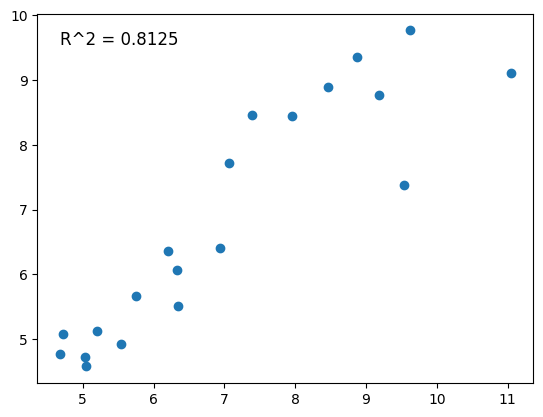

MAE: 0.5779981779496953
MSE: 0.6358406072820808
RMSE: 0.7973961420035093


In [200]:
r_squared = r2_score(y_test, y_pred)

# Display R^2 on the plot
plt.text(np.min(y_test), np.max(y_pred), f'R^2 = {r_squared:.4f}', fontsize=12, verticalalignment='top')
plt.scatter(y_test, y_pred)
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Lasso Regression

In [201]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [202]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.8534739668278754


In [203]:
prediction_lasso = lasso_regressor.predict(X_test)

<Axes: ylabel='Density'>

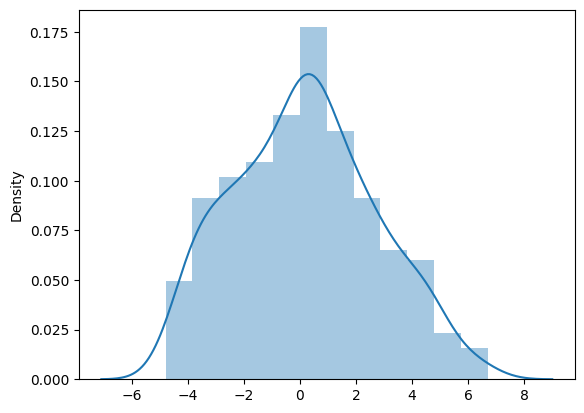

In [204]:
sns.distplot(y_test - prediction_lasso)

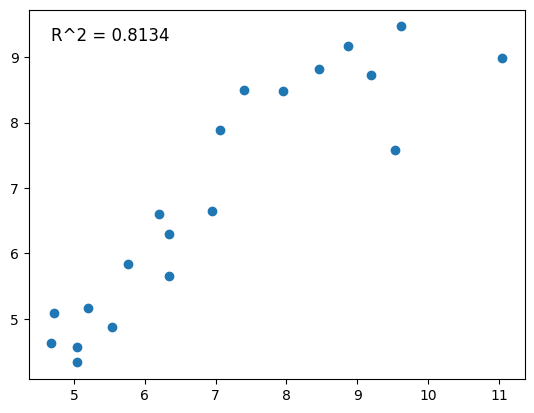

MAE: 0.5761877508797569
MSE: 0.632781058622915
RMSE: 0.795475366446325


In [205]:
r_squared = r2_score(y_test, prediction_lasso)

# Display R^2 on the plot
plt.text(np.min(y_test), np.max(prediction_lasso), f'R^2 = {r_squared:.4f}', fontsize=12, verticalalignment='top')
plt.scatter(y_test, prediction_lasso)
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

## Ridge Regression

In [206]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [207]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [208]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-0.8534606109647536


In [209]:
prediction_ridge = ridge_regressor.predict(X_test)

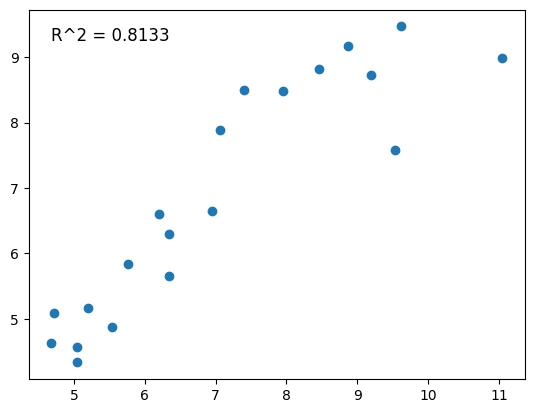

MAE: 0.5765874674785973
MSE: 0.6329447419604939
RMSE: 0.7955782437702114


In [210]:
r_squared = r2_score(y_test,prediction_ridge)

# Display R^2 on the plot
plt.text(np.min(y_test), np.max(prediction_ridge), f'R^2 = {r_squared:.4f}', fontsize=12, verticalalignment='top')
plt.scatter(y_test, prediction_ridge)
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, prediction_ridge))
print('MSE:', metrics.mean_squared_error(y_test, prediction_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge)))

# Random Forest

In [211]:
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor model

In [212]:
rf = RandomForestRegressor()

In [213]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [214]:
print("Coefficient of determination R^2  - train set: {}".format(rf.score(X_train, y_train)))
print("Coefficient of determination R^2  - test set: {}".format(rf.score(X_test, y_test)))

Coefficient of determination R^2  - train set: 0.9493110612988739
Coefficient of determination R^2  - test set: 0.7829763928209872


In [215]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf, X, y, cv=5)

In [216]:
score.mean()

0.6187835449579734

In [217]:
RandomForestRegressor()

RandomForestRegressor()

In [218]:
from sklearn.model_selection import RandomizedSearchCV # to determine the hyperparameters

In [219]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1300, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [220]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 209, 318, 427, 536, 645, 754, 863, 972, 1081, 1190, 1300], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 12, 19, 26, 33, 40], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [221]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf1 = RandomForestRegressor()

In [222]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf1_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [223]:
rf1_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=427; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=427; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=427; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=427; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=427; total time=   0.6s
[CV] END max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=209; total time=   0.3s
[CV] END max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=209; total time=   0.3s
[CV] END max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 12, 19, 26, 33, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 209, 318, 427,
                                                         536, 645, 754, 863,
                                                         972, 1081, 1190,
                                                         1300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [224]:
rf1_random.best_params_

{'n_estimators': 645,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 12}

In [225]:
rf1_random.best_score_

-0.9003739991807785

In [226]:
prediction_rf1 = rf1_random.predict(X_test)

<Axes: ylabel='Density'>

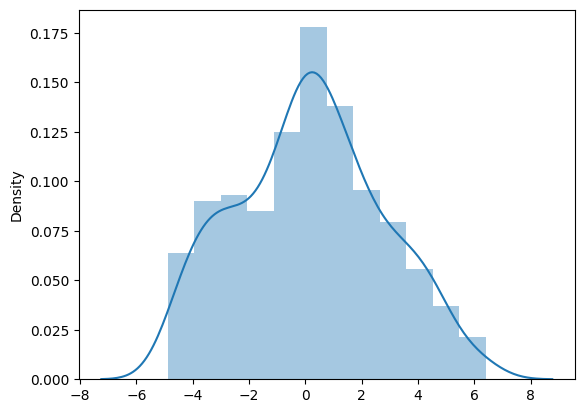

In [227]:
sns.distplot(y_test - prediction_rf1)

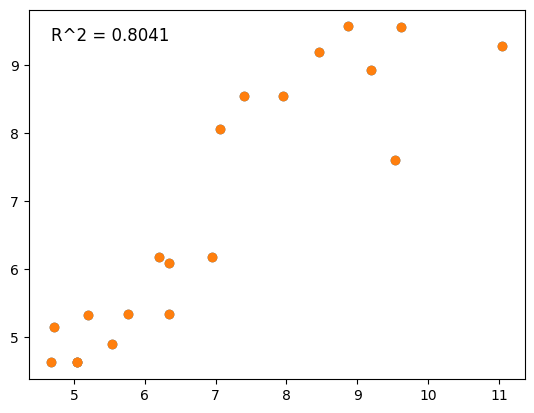

In [228]:
r_squared = r2_score(y_test, prediction_rf1)

# Display R^2 on the plot
plt.text(np.min(y_test), np.max(prediction_rf1), f'R^2 = {r_squared:.4f}', fontsize=12, verticalalignment='top')
plt.scatter(y_test, prediction_rf1)

plt.scatter(y_test, prediction_rf1)
plt.show()

In [229]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rf1))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rf1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf1)))

MAE: 0.632185722888275
MSE: 0.6641133481651917
RMSE: 0.8149314990630757
